In [1]:
%load_ext autoreload
%autoreload 2

import numpy  as np

from matplotlib import pyplot as plt

from common import hallmark as hm
from common import io
from common import viz

In [2]:
pf = hm.ParaFrame(
    'data/{mag}a{aspin:g}_86GHz/img_s{snapshot:d}_Rh{Rhigh:g}_i{inc:g}.h5'
).sort_values(
    ['Rhigh', 'inc', 'snapshot']
)

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])

mag ['M']
aspin [0.]
snapshot [1000]
inc [10. 30. 50. 70.]
Rhigh [  1.  10.  40. 160.]


In [3]:
sel = pf(inc=70)
sel

,path,mag,aspin,snapshot,Rhigh,inc
11,data/Ma0_86GHz/img_s01000_Rh1_i70.h5,M,0.0,1000,1.0,70.0
3,data/Ma0_86GHz/img_s01000_Rh10_i70.h5,M,0.0,1000,10.0,70.0
15,data/Ma0_86GHz/img_s01000_Rh40_i70.h5,M,0.0,1000,40.0,70.0
7,data/Ma0_86GHz/img_s01000_Rh160_i70.h5,M,0.0,1000,160.0,70.0


In [4]:
imgs = io.load_mov(sel.path)

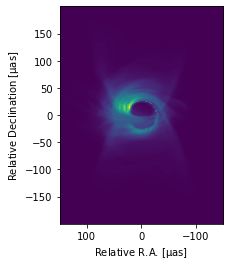

In [5]:
ax = viz.show(imgs, s=0)

In [6]:
display(imgs.meta.mass, imgs.meta.dist, imgs.meta.freq)

<Quantity 4141166.64059526 solMass>

<Quantity 8127.00110226 pc>

<Quantity 86. GHz>

In [7]:
display(imgs.meta.time, imgs.meta.width, imgs.meta.height)

<Quantity [5000.00336439, 5000.00336439, 5000.00336439, 5000.00336439] M>

<Quantity 59.64631839 M>

<Quantity 79.52842452 M>